In [228]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [229]:
data = pd.read_csv("ex1data1.txt", header = None, names = ["Population", "Profit"])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [230]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


# View the data in Scatter plot

<function matplotlib.pyplot.show(*args, **kw)>

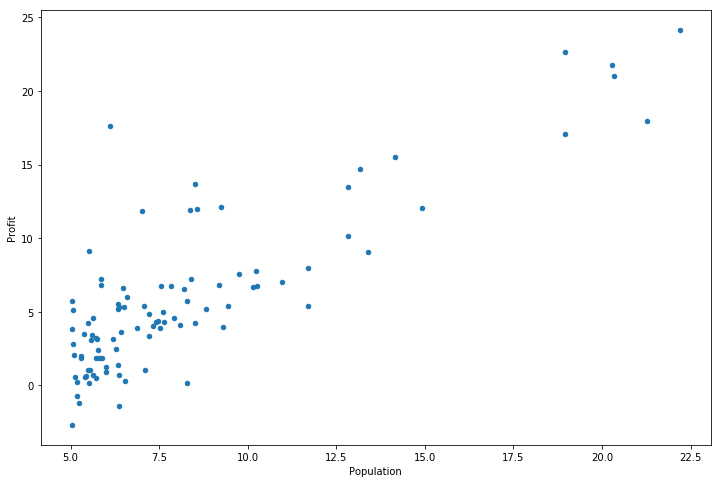

In [231]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))
plt.show

# Use the gradient decent to realize the linear regression

In [208]:
def computeCost(X, y, theta):
    inner  = np.power(((X*theta.T) - y), 2)
    return np.sum(inner)/ (2 * len(X))

In [209]:
data.insert(0, "Ones", 1)

In [210]:
#Set X (training data) and y (target value)
cols = data.shape[1]
x = data.iloc[:, 0:cols-1] 
y = data.iloc[:, cols-1: cols]

In [211]:
x.head()


,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [212]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [213]:
x = np.matrix(x.values) # turn to numpy array
y = np.matrix(y.values) # turn to numpy array
theta = np.matrix(np.array([0, 0])) # theta is a 1 by 2 matrix

In [214]:
#check the dimension for matrice
print(x.shape, theta.shape, y.shape)

(97, 2) (1, 2) (97, 1)


In [215]:
#initial guess theta is (0,0) for calculating cost function  
computeCost(x, y, theta)

32.072733877455676

# batch gradient decent

In [216]:
def gradientDescent(x, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (x * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, x[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(x)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(x, y, theta)
        
    return theta, cost
    

In [217]:
# initialize learning rate and iteration count
alpha = 0.01
iters = 1000

In [218]:
# Use gradient descent to train the training data for learning the model to determined the theta parameters.
(g, cost) = gradientDescent(x, y, theta, alpha, iters)
g

matrix([[-3.24140214,  1.1272942 ]])

In [219]:
#Use the fitting theta to calculate the cost function
computeCost(x, y, g)

4.515955503078912

# Visulize the regression model and data points

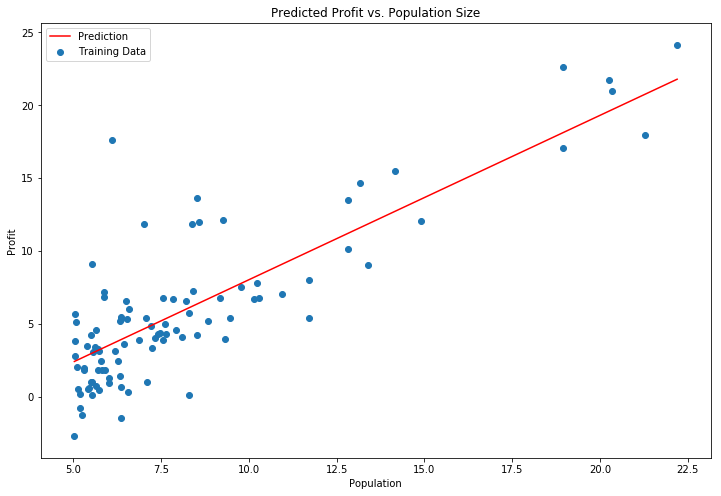

In [220]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, "r", label = "Prediction")
ax.scatter(data.Population, data.Profit, label = "Training Data")
ax.legend(loc = 2)
ax.set_xlabel("Population")
ax.set_ylabel("Profit")
ax.set_title("Predicted Profit vs. Population Size")
plt.show()

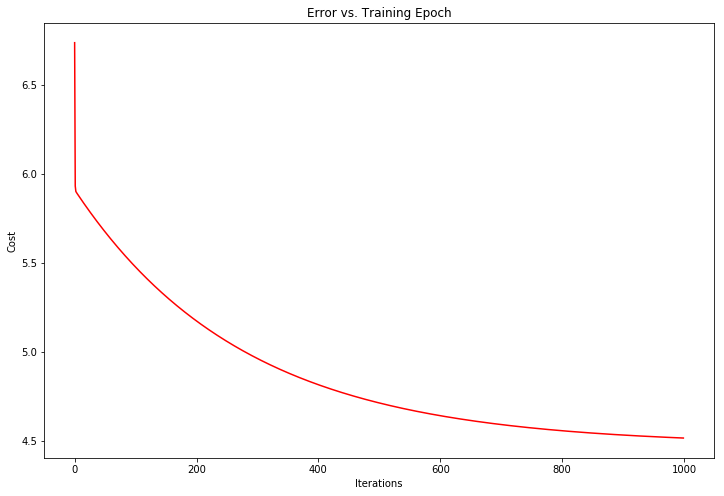

In [221]:
#Observe the cost function changing with respect to the iteration
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, "r")
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
ax.set_title("Error vs. Training Epoch")
plt.show()

# Multi-variable linear regression

In [222]:
data2 = pd.read_csv("ex1data2.txt", header = None, names = ["Size", "Bedrooms", "Price"])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [223]:
# Data preprocess using renormalization due to the features scale.
data2 = (data2 - data2.mean()) / data2.std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [224]:
# Same procedue like single variable regression

#add ones column
data2.insert(0, 'Ones', 1)

#set training and target varibles
cols = data2.shape[1]
x2 = data2.iloc[:,0:cols-1]
y2 = data2.iloc[:,cols-1:cols]

#initial values for x2,y2 and theta
x2 = np.matrix(x2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0]))

g2, cost2 = gradientDescent(x2, y2, theta2, alpha, iters)

#print the cost (error) of the model
computeCost(x2, y2, g2)




0.13070336960771892

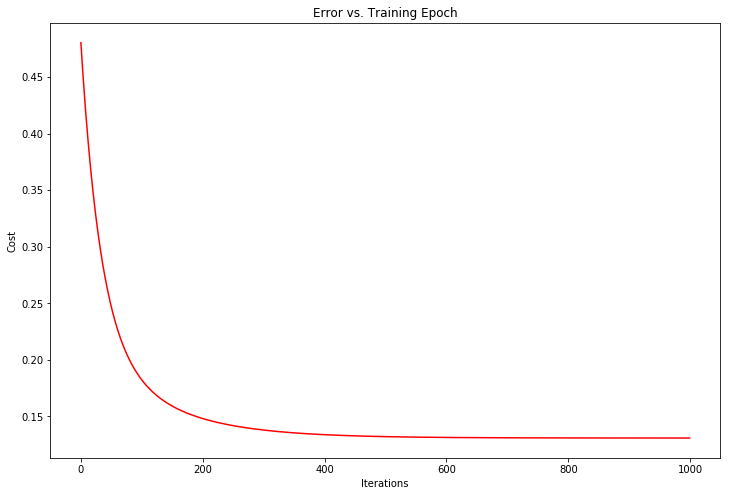

In [237]:
#visulalize the result
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()